<a href="https://colab.research.google.com/github/code-rishav/Github_Repo_Analysis/blob/main/github_repos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/github_analysis"

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import ast
import re

# **Analysing the commits dataset**

In [ ]:
commits = pd.read_csv(file_path+"/commits.csv")
contents = pd.read_csv(file_path+"/contents.csv")
licenses = pd.read_csv(file_path+"/licenses.csv")
languages = pd.read_csv(file_path+"/languages.csv")

<ipython-input-4-131845fd7844>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  commits = pd.read_csv(file_path+"/commits.csv")
<ipython-input-4-131845fd7844>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  contents = pd.read_csv(file_path+"/contents.csv")


In [ ]:
sample_commits = pd.read_csv(file_path+"/sample_commits.csv")
sample_file = pd.read_csv(file_path+"/sample_files.csv")
sample_repos = pd.read_csv(file_path+"/sample_repos.csv")

<ipython-input-5-ebde39afcc80>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_file = pd.read_csv(file_path+"/sample_files.csv")


In [ ]:
commits['repo_name'] = commits['repo_name'].str.replace("[", "").str.replace("]", "").str.replace("'", "")

<ipython-input-6-7996712ce50b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  commits['repo_name'] = commits['repo_name'].str.replace("[", "").str.replace("]", "").str.replace("'", "")


In [ ]:
# Rename columns to be more descriptive
df = commits
df = df.rename(columns={
    'commit': 'commit_id',
    'tree': 'tree_id',
    'parent': 'parent_id',
    'author': 'author_name',
    'committer': 'committer_name',
    'difference_truncated': 'diff_truncated'
})

# Check for duplicate column names
df = df.loc[:,~df.columns.duplicated()]

# Handle missing values
df = df.fillna({'diff_truncated': True})

# Ensure correct data types
df['commit_id'] = df['commit_id'].astype(str)
df['repo_name'] = df['repo_name'].astype('category')

# Filter outlier rows if needed
df = df[df['message'].str.len() < 1000]

# Reset index if needed
df = df.reset_index(drop=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294827 entries, 0 to 294826
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Unnamed: 0      294827 non-null  object  
 1   commit_id       294827 non-null  object  
 2   tree_id         294827 non-null  object  
 3   parent_id       294827 non-null  object  
 4   author_name     294827 non-null  object  
 5   committer_name  294827 non-null  object  
 6   subject         290664 non-null  object  
 7   message         294827 non-null  object  
 8   trailer         294827 non-null  object  
 9   difference      294827 non-null  object  
 10  diff_truncated  294827 non-null  bool    
 11  repo_name       294827 non-null  category
 12  encoding        164 non-null     object  
dtypes: bool(1), category(1), object(11)
memory usage: 28.6+ MB
None


# **ANALYSING THE CONTENT DATASET**
The following are heads:

* id
* size
* content
* binary
* copies

In [ ]:
file_path = '/content/drive/MyDrive/github_analysis'
df = pd.read_csv(file_path +'/contents.csv')

print(df.head())

   Unnamed: 0                                        id   size content binary  \
0         0.0  717cfe0b4683282ee998eb3613c2cc8338ecac76   2400     NaN   True   
1         1.0  502a739d7c68b1e27ea97bc6e90e4450c90f7a84  90184     NaN   True   
2         2.0  b5e390bb5120afe8f8706c0380686c07b1aa2184   2468     NaN   True   
3         3.0  fc93e84301e8a42297feec915ff6ec50b907b509    100     NaN   True   
4         4.0  9a1e75463c27745c32d726555f2c2d9efffcb281   2960     NaN   True   

   copies  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  


<ipython-input-8-8ecee5c74923>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path +'/contents.csv')


### **ANALYSING THE LANGUAGES DATASET**
Columns present in the dataset:


*   repo_name
*   language



In [ ]:
#read the languages dataset
languages = pd.read_csv(file_path+"/languages.csv")

In [ ]:
languages.head()

,Unnamed: 0,repo_name,language
0,0,lemi136/puntovent,"[{'name': 'C', 'bytes': 80}]"
1,1,taxigps/nctool,"[{'name': 'C', 'bytes': 4461}]"
2,2,ahy1/strbuf,"[{'name': 'C', 'bytes': 5573}]"
3,3,nleiten/mod_rpaf-ng,"[{'name': 'C', 'bytes': 30330}]"
4,4,kmcallister/alameda,"[{'name': 'C', 'bytes': 17077}]"


In [ ]:
# drop non-necessary columns
languages.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
# examining missing values
print("Missing values distribution: ")
print(languages.isnull().mean())
print("")

Missing values distribution: 
repo_name    0.0
language     0.0
dtype: float64



In [ ]:
# check datatype in each column
print("Column datatypes: ")
print(languages.dtypes)
print("Rows in dataset: ",len(languages))

Column datatypes: 
repo_name    object
language     object
dtype: object
Rows in dataset:  300000


In [ ]:
languages.head()

,repo_name,language
0,lemi136/puntovent,"[{'name': 'C', 'bytes': 80}]"
1,taxigps/nctool,"[{'name': 'C', 'bytes': 4461}]"
2,ahy1/strbuf,"[{'name': 'C', 'bytes': 5573}]"
3,nleiten/mod_rpaf-ng,"[{'name': 'C', 'bytes': 30330}]"
4,kmcallister/alameda,"[{'name': 'C', 'bytes': 17077}]"


the language column contains, data in json format,

{'name':'language_name','byte':'size'}

so we have created two different columns for language and size

In [ ]:

pattern = r"(?<=})\s(?={)"
df = languages['language'].apply(lambda x: re.split(pattern, x))

In [ ]:
df[3]

["[{'name': 'C', 'bytes': 30330}]"]

In [ ]:
language_freq = dict()
for data in df:
  try:
    dictionaries = [ast.literal_eval(entry.replace("[", "").replace("]", "")) for entry in data]
    for dictionary in dictionaries:
      name = dictionary.get('name')
      bytes_value = dictionary.get('bytes')
      if name in language_freq:
        language_freq[name] = language_freq[name]+1
      else:
        language_freq[name] = 1
      #print(f"Name: {name}, Bytes: {bytes_value}")
  except:
    pass

In [ ]:
from operator import itemgetter
sorted_frequency = sorted(language_freq.items(), key=itemgetter(1), reverse=True)


Text(0.5, 1.0, 'Language Popularity Score')

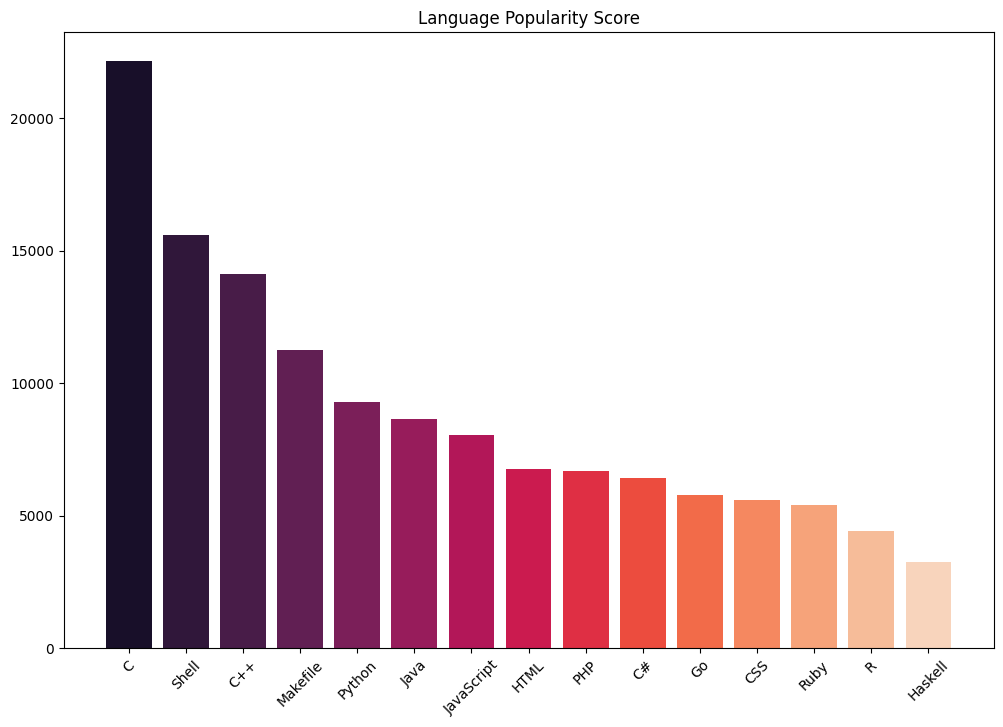

In [ ]:
language = list(zip(*sorted_frequency[:15]))[0]
count = list(zip(*sorted_frequency[:15]))[1]
x_pos = np.arange(len(language))
# slope, intercept = np.polyfit(x_pos, count, 1)
# trendline = intercept + (slope * x_pos)
plt.figure(figsize=(12,8))
# plt.plot(x_pos, trendline, color='black', linestyle='--')
plt.bar(x_pos, count,align='center',color=sns.color_palette("rocket",len(x_pos)))
plt.xticks(x_pos, language,rotation=45)
plt.title('Language Popularity Score')

# ANALYSING THE LICENSES DATA

In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/github_analysis"
licenses = pd.read_csv(file_path+"/licenses.csv")
print("Columns in licenses DataFrame:", licenses.columns)


Columns in licenses DataFrame: Index(['Unnamed: 0', 'repo_name', 'license'], dtype='object')


In [ ]:
licenses.head()

,Unnamed: 0,repo_name,license
0,0,autarch/Dist-Zilla-Plugin-Test-TidyAll,artistic-2.0
1,1,thundergnat/Prime-Factor,artistic-2.0
2,2,kusha-b-k/Turabian_Engin_Fan,artistic-2.0
3,3,onlinepremiumoutlet/onlinepremiumoutlet.github.io,artistic-2.0
4,4,huangyuanlove/LiaoBa_Service,artistic-2.0


In [ ]:
license_freq = licenses['license'].value_counts()

In [ ]:
license_freq

mit             273730
isc              17735
artistic-2.0      8535
Name: license, dtype: int64

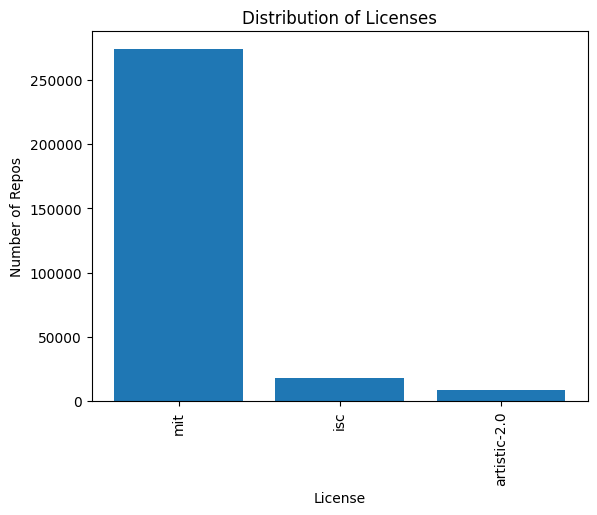

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
licenses = ['mit', 'isc', 'artistic-2.0']
license_freq = [273730, 17735, 8535]

#  plot
plt.title('Distribution of Licenses')
plt.xlabel('License')
plt.xticks(rotation=90)
plt.ylabel('Number of Repos')
plt.bar(licenses, license_freq)

plt.show()


# **Analysing the sample files and license Dataset**

The following are Dataset heads:
* repo_name
* license
* ref
* path
* mode
* id
* symlink_target





In [ ]:
import pandas as pd
sample_files = pd.read_csv(file_path+"/sample_files.csv")
# licenses=pd.DataFrame(licenses)
sample_files.head()

<ipython-input-25-5039f76300b1>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_files = pd.read_csv(file_path+"/sample_files.csv")


,Unnamed: 0,repo_name,ref,path,mode,id,symlink_target
0,0.0,np/ling,refs/heads/master,tests/success/case_proto2.t/case_proto2.ll,40960.0,9f895542eac251eb62a66e191ab62a2f10cef3d2,../../../fixtures/all/case_proto2.ll
1,1.0,np/ling,refs/heads/master,tests/success/sum_int.t/sum_int.ll,40960.0,b725eb2294f3e4db2692272112a915a953741049,../../../fixtures/all/sum_int.ll
2,2.0,np/ling,refs/heads/master,fixtures/sequence/fwd_send_recv_recv_send.ll,40960.0,2a209e8e3673eb4d0c5241be2a832311703d95e6,../all/fwd_send_recv_recv_send.ll
3,3.0,np/ling,refs/heads/master,tests/failure/wrong_order_seq_seq_send2.t/wron...,40960.0,61716046c768c9699d88f84d0877871425b6e1f7,../../../fixtures/all/wrong_order_seq_seq_send...
4,4.0,np/ling,refs/heads/master,tests/failure/wrong_fun1_to_proc_par2.t/wrong_...,40960.0,77dd3e185c9749bbb25640a207a2454908435010,../../../fixtures/all/wrong_fun1_to_proc_par2.ll


In [ ]:
# concat = pd.merge(licenses, sample_files, on='repo_name', how='outer')
# # concat = concat.drop_duplicates(subset=['repo_name'])
# Check the case of the column names
# print("Columns in licenses DataFrame:", licenses.columns)
print("Columns in sample_files DataFrame:", sample_files.columns)
concat = pd.merge(licenses, sample_files, on='repo_name')


Columns in sample_files DataFrame: Index(['Unnamed: 0', 'repo_name', 'ref', 'path', 'mode', 'id',
       'symlink_target'],
      dtype='object')


TypeError: ignored

In [ ]:
concat.head()

In [ ]:
file_count = concat['license'].value_counts()
file_count

In [ ]:
#plot the data above
# License Compliance by Package Size
# We can analyze if larger packages are more compliant in specifying licenses using a scatter plot:
import matplotlib.pyplot as plt

plt.scatter('size_mb', 'has_license', data=concat)
plt.xlabel('Package Size (MB)')
plt.ylabel('% With License')
plt.title('License Compliance by Size')

plt.show()

In [ ]:
sample_files.dropna(inplace=True)

In [ ]:
#How many commits have been made in repos written in the any programming language?
#use commits file and sample_files here
sample_files = sample_file.dropna()
python_files = sample_files[sample_files['path'].str.endswith('.py')]
len(python_files)

In [38]:
# type(commits['repo_name'][0])
merge = pd.merge(sample_files,commits,on='repo_name')
merge.columns

TypeError: ignored

In [ ]:
#find the top contributors
len(merge)
python_files = python_files[python_files['path'].str.endswith('.py')]
print(python_files.columns)

In [ ]:
grouped = python_files.groupby(python_files.repo_name)
grouped.count()

<ipython-input-36-d825a24f1f48>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  commits = pd.read_csv(file_path+"/commits.csv")


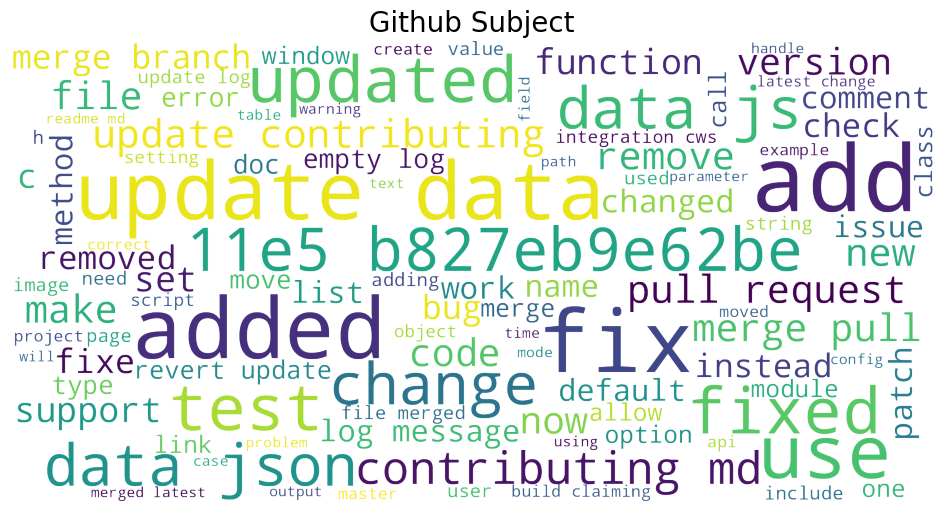

In [36]:
#most common subject in repo
'''Wordcloud is a popular Python package used to generate visual representations of text data.
It uses a technique called "word collocation" to analyze the frequency of words in a given text and display them in a cloud-like format,
 where the size and position of each word reflect its importance.'''

commits = pd.read_csv(file_path+"/commits.csv")
from wordcloud import WordCloud
import random
cleaned_subjects = [str(subj) for subj in commits.subject if isinstance(subj, str)]
commits = ' '.join(cleaned_subjects).lower()
# wordcloud for display address
plt.figure(figsize=(12,6))
wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA"
, max_font_size=200,
                            width=2000,
                            height=1000,
                            max_words=100,
                            relative_scaling=.5).generate(commits)
plt.imshow(wc)
#plt.imshow(wc)
plt.title("Github Subject", fontsize=20)
plt.savefig('github-subject-wordcloud.png')
plt.axis("off");

In [37]:
pattern = r"(?<=})\s(?={)"
df = commits['committer'].apply(lambda x: re.split(pattern, x))
committer_freq = dict()
for data in df:
  try:
    dictionaries = [ast.literal_eval(entry.replace("[", "").replace("]", "")) for entry in data]
    for dictionary in dictionaries:
      name = dictionary.get('name')
      if name in committer_freq:
        committer_freq[name] = committer_freq[name]+1
      else:
        committer_freq[name] = 1
      #print(f"Name: {name}, Bytes: {bytes_value}")
  except:
    pass
  committer_freq

TypeError: ignored

In [ ]:
from operator import itemgetter
committer_frequency = sorted(committer_freq.items(), key=itemgetter(1), reverse=True)

In [ ]:
top_10 = committer_frequency[:10]

In [ ]:
#plot this
names, values = zip(*top_10)
plt.figure(figsize=(8, 6))
plt.bar(names, values, color='skyblue')

# Adding labels and title
plt.xlabel('Contributors')
plt.ylabel('Commits')
plt.title('Bar Graph of top contributors')

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
branches = sample_file['ref']
branch_count = {'master':0,'others':0}
count = 0
for b in branches:
  match = re.search(r'heads/(.*)', b)
  if match:
    extracted_branch = match.group(1)
    if extracted_branch == 'master':
      count +=1
      branch_count['master'] = branch_count['master']+1
    else:
      branch_count['others'] = branch_count['others']+1
print(branch_count)
print(count)
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(branch_count.values(), labels=branch_count.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of branches ")
plt.show()

In [ ]:
#find most popular repositories
sample_repos.head()
sorted_repos = sample_repos.sort_values(by='watch_count',ascending=False)
print(sorted_repos)

In [ ]:
plt.figure(figsize=(12,8))
g = sns.barplot(y="repo_name", x="watch_count", data=sorted_repos[:10], palette="summer")
plt.title('Trending Github Repositories')
plt.ylabel("Repository Name")
plt.xlabel("Watch Count")
plt.savefig('github-trending-repo-by-watch-count.png');

# **ANALYSING THE COMMITS AND SAMPLE REPOS**

#Problem statement:
Find the correlation between, commits performed on a repo to the watch count on the repo

In [ ]:
# from scipy.stats import pearsonr

# sample_repos= pd.read_csv(file_path+"/sample_repos.csv")
# commits= pd.read_csv(file_path+"/commits.csv")

# # Merge the two datasets on repo_name column
# Merge_SC= pd.merge(sample_repos, commits, on='repo_name')

In [ ]:
from scipy.stats import pearsonr
import seaborn as sns


commits = pd.read_csv(file_path+"/commits.csv")
sample_repos = pd.read_csv(file_path+"/sample_repos.csv")
print(len(commits))
print(len(repos))


In [ ]:
# Calculate the length of commit messages
commits['commit_message_length'] = commits['message'].apply(lambda x: len(str(x)))

# Aggregate commit message length by repo
commit_message_length = commits.groupby('repo_name')['commit_message_length'].mean().reset_index()

# Merge commit message length and watch count DataFrames
merged_df = pd.merge(commit_message_length, sample_repos, on='repo_name', how='inner')

# Check if there are enough data points for plotting
if not merged_df.empty:
    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='commit_message_length', y='watch_count', data=merged_df)

    plt.xlabel("Average Commit Message Length")
    plt.ylabel("Watch Count")
    plt.title("Relationship between Commit Message Length and Watch Count")

    plt.show()
else:
    print("Not enough data points for plotting.")